# Distinguishing Cited and Repackaged Instances, Topic Modeling, Mapping, & Link Parsing

## Distinguishing Cited and Repackaged Instances

In [1]:
import pandas as pd # used for creating/manipulating data frames

# read in data
foundlinks = pd.read_excel("foundlinks.modeling 1.xlsx")
foundlinks.head

<bound method NDFrame.head of                                                    url  \
0    http://bonddad.blogspot.com/2021/12/manufactur...   
1    http://bonddad.blogspot.com/2023/09/initial-jo...   
2    http://bostongis.org/?content_name=umn_datasou...   
3    http://bostongis.org/?content_name=umn_datasou...   
4    http://colonialsense.com/society-lifestyle/cen...   
..                                                 ...   
757   https://www.medfieldpubliclibrary.org/databases/   
758  https://www.nature.com/articles/s41893-020-006...   
759  https://www.plannedparenthoodaction.org/florid...   
760  https://www.socialexplorer.com/data/acs2006/me...   
761        https://yelmwa.gov/news_detail_t10_r448.php   

                                           Found Links  \
0                      http://www.census.gov/econ/www/   
1                      http://www.census.gov/econ/www/   
2       http://www.census.gov/geo/www/tiger/index.html   
3     http://www.census.gov/geo/www/cob/b

In [2]:
# Perform cleaning again to the data just to be safe

#getting rid of special characters and lower caseing content
pattern = r'[^a-zA-Z0-9\s]'
foundlinks['content'] = foundlinks['content'].str.replace(pattern,'',regex=True)
# Remove new line characters
foundlinks['content'] = foundlinks['content'].str.replace(r'\n', '', regex=True)
foundlinks = foundlinks.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [3]:
#Sites had multiple found links, combining them to reduce duplicate URls and content
unique_links_per_url = foundlinks.groupby('url')['Found Links'].unique().reset_index()
unique_links_per_url # view data

,url,Found Links
0,http://bonddad.blogspot.com/2021/12/manufactur...,[http://www.census.gov/econ/www/]
1,http://bonddad.blogspot.com/2023/09/initial-jo...,[http://www.census.gov/econ/www/]
2,http://bostongis.org/?content_name=umn_datasou...,[http://www.census.gov/geo/www/tiger/index.htm...
3,http://colonialsense.com/society-lifestyle/cen...,[mailto:?subject=colonial sense: society-lifes...
4,http://fileformats.archiveteam.org/index.php?t...,[https://www.census.gov/programs-surveys/cps.h...
...,...,...
323,https://www.withdra.com/p/mind-the-gap-explori...,[https://www.census.gov/library/publications/2...
324,https://www.wxpr.org/2022-07-28/these-hurrican...,[https://data.census.gov/]
325,https://www.wyomingpublicmedia.org/news/2021-0...,[https://www.census.gov/data/experimental-data...
326,https://yelmwa.gov/i_want_to/contact/send_a_no...,[https://2020census.gov/en]


In [4]:
#key words for finding if site is repackaged or cited

keywords = ["tables","table","data","quickfacts"]

pattern = '|'.join(keywords)  

# Function to check if any link in the list contains a keyword
def contains_keyword(links, pattern):
    # Return True if any link contains a keyword, otherwise False
    return any(pd.notna(link) and pd.Series(link).str.contains(pattern, case=False, regex=True).any() 
               for link in links)

# Apply the function to create a new column 'contains_keywords'
unique_links_per_url['Source'] = unique_links_per_url['Found Links'].apply(lambda x: contains_keyword(x, pattern))
unique_links_per_url['Source'] = unique_links_per_url['Source'].replace({True: 'repackaged', False: 'cited'})

unique_links_per_url

,url,Found Links,Source
0,http://bonddad.blogspot.com/2021/12/manufactur...,[http://www.census.gov/econ/www/],cited
1,http://bonddad.blogspot.com/2023/09/initial-jo...,[http://www.census.gov/econ/www/],cited
2,http://bostongis.org/?content_name=umn_datasou...,[http://www.census.gov/geo/www/tiger/index.htm...,cited
3,http://colonialsense.com/society-lifestyle/cen...,[mailto:?subject=colonial sense: society-lifes...,cited
4,http://fileformats.archiveteam.org/index.php?t...,[https://www.census.gov/programs-surveys/cps.h...,cited
...,...,...,...
323,https://www.withdra.com/p/mind-the-gap-explori...,[https://www.census.gov/library/publications/2...,cited
324,https://www.wxpr.org/2022-07-28/these-hurrican...,[https://data.census.gov/],repackaged
325,https://www.wyomingpublicmedia.org/news/2021-0...,[https://www.census.gov/data/experimental-data...,repackaged
326,https://yelmwa.gov/i_want_to/contact/send_a_no...,[https://2020census.gov/en],cited


In [5]:
# combining content since we combined the links
combined_content = foundlinks.groupby('url')['content'].apply(' '.join).reset_index()
combined_content

,url,content
0,http://bonddad.blogspot.com/2021/12/manufactur...,the bonddad blog manufacturing still red hot c...
1,http://bonddad.blogspot.com/2023/09/initial-jo...,the bonddad blog initial jobless claims remain...
2,http://bostongis.org/?content_name=umn_datasou...,ogr odbcboston geographic information systemsh...
3,http://colonialsense.com/society-lifestyle/cen...,colonial sense societylifestyle census governa...
4,http://fileformats.archiveteam.org/index.php?t...,cps project just solve the file format proble...
...,...,...
323,https://www.withdra.com/p/mind-the-gap-explori...,vibecession exploring the growing divide betwe...
324,https://www.wxpr.org/2022-07-28/these-hurrican...,these hurricane flood maps reveal the climate ...
325,https://www.wyomingpublicmedia.org/news/2021-0...,single mothers bore brunt of coronavirus anxie...
326,https://yelmwa.gov/i_want_to/contact/send_a_no...,welcome to yelm washingtonskip to contentsearc...


In [6]:
# create and view final data
final_data = pd.merge(unique_links_per_url, combined_content, on='url')
final_data

,url,Found Links,Source,content
0,http://bonddad.blogspot.com/2021/12/manufactur...,[http://www.census.gov/econ/www/],cited,the bonddad blog manufacturing still red hot c...
1,http://bonddad.blogspot.com/2023/09/initial-jo...,[http://www.census.gov/econ/www/],cited,the bonddad blog initial jobless claims remain...
2,http://bostongis.org/?content_name=umn_datasou...,[http://www.census.gov/geo/www/tiger/index.htm...,cited,ogr odbcboston geographic information systemsh...
3,http://colonialsense.com/society-lifestyle/cen...,[mailto:?subject=colonial sense: society-lifes...,cited,colonial sense societylifestyle census governa...
4,http://fileformats.archiveteam.org/index.php?t...,[https://www.census.gov/programs-surveys/cps.h...,cited,cps project just solve the file format proble...
...,...,...,...,...
323,https://www.withdra.com/p/mind-the-gap-explori...,[https://www.census.gov/library/publications/2...,cited,vibecession exploring the growing divide betwe...
324,https://www.wxpr.org/2022-07-28/these-hurrican...,[https://data.census.gov/],repackaged,these hurricane flood maps reveal the climate ...
325,https://www.wyomingpublicmedia.org/news/2021-0...,[https://www.census.gov/data/experimental-data...,repackaged,single mothers bore brunt of coronavirus anxie...
326,https://yelmwa.gov/i_want_to/contact/send_a_no...,[https://2020census.gov/en],cited,welcome to yelm washingtonskip to contentsearc...


## Topic Modeling

### LDA

In [7]:
from sklearn.feature_extraction.text import CountVectorizer # turn corpus of text into document-term matrix
from gensim.corpora import Dictionary # create dictionary
from nltk.corpus import stopwords # removal of stopwords
from nltk.stem import WordNetLemmatizer # lemmatize text

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stop words
stop_words = stopwords.words('english') # standard English stopwords
stop_words.extend(["data", "census", "bureau"]) # words specific to this data set that add little meaning

# Preprocessing function to lemmatize text
def preprocess(text):
    tokens = text.split()  # tokenization
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]  
    return ' '.join(lemmatized)  # Return the lemmatized text

# Apply the preprocessing function to the content
final_data['content'] = final_data['content'].apply(preprocess)

# Vectorize the content with CountVectorizer
vec = CountVectorizer(stop_words=stop_words, max_df=0.8, min_df=0.2, token_pattern=r'\b[a-zA-Z]{3,}\b') 
X = vec.fit_transform(final_data['content']) # removes stopwords, words in more than 80% and less than 20% of records, numbers, and words with less than 3 characters

# Map terms to their ids for gensim compatibility
terms = vec.get_feature_names_out()

# Prepare the texts as tokenized lists (for coherence calculation)
tokenized_texts = [doc.split() for doc in final_data['content']]

# Create dictionary for coherence model
dictionary = Dictionary(tokenized_texts)

# Range of topic numbers to test
topics_range = range(3, 25)

In [8]:
import numpy as np # numpy functions
from sklearn.decomposition import LatentDirichletAllocation # LDA model
from gensim.models.coherencemodel import CoherenceModel # coherence scores
from sklearn.preprocessing import normalize # exclusivity calc

# Define a function to calculate coherence and exclusivity
def evaluate_topic_model(X, tokenized_texts, terms, num_topics, dictionary):
    # Initialize LDA
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=225)
    lda.fit(X)

    # Calculate Coherence
    topics = []
    for topic in lda.components_:
        top_word_ids = topic.argsort()[-20:][::-1]  # analyzes top 20 words
        topic_words = [terms[i] for i in top_word_ids]
        topics.append(topic_words)

    coherence_model = CoherenceModel(
        topics=topics,
        texts=tokenized_texts,
        dictionary=dictionary,
        coherence='u_mass'
    )
    coherence_score = coherence_model.get_coherence()

    # Calculate Exclusivity
    topic_word_distributions = normalize(lda.components_, norm='l1', axis=1)
    exclusivity_scores = []
    for i, topic in enumerate(topic_word_distributions):
        top_word_ids = topic.argsort()[-20:][::-1]
        top_words = [terms[idx] for idx in top_word_ids]

        # Calculate exclusivity as uniqueness of each word in the topic
        exclusivity = 0
        for word in top_words:
            word_count = sum(word in other_topic for other_topic in topics)
            exclusivity += 1 / word_count  # Higher exclusivity if the word is rare across topics
        exclusivity_scores.append(exclusivity / len(top_words))  # Average exclusivity for this topic

    # Average exclusivity across all topics
    average_exclusivity = np.mean(exclusivity_scores)

    return coherence_score, average_exclusivity


results = []

for num_topics in topics_range:
    coherence_score, exclusivity_score = evaluate_topic_model(X, tokenized_texts, terms, num_topics, dictionary)
    results.append({
        'num_topics': num_topics,
        'coherence': coherence_score,
        'exclusivity': exclusivity_score
    })

# Display results
for result in results:
    print(f"Topics: {result['num_topics']}, Coherence: {result['coherence']:.4f}, Exclusivity: {result['exclusivity']:.4f}")

Topics: 3, Coherence: -0.8003, Exclusivity: 0.8333
Topics: 4, Coherence: -0.8513, Exclusivity: 0.8125
Topics: 5, Coherence: -0.8822, Exclusivity: 0.7800
Topics: 6, Coherence: -0.8473, Exclusivity: 0.7667
Topics: 7, Coherence: -0.8447, Exclusivity: 0.7071
Topics: 8, Coherence: -0.8590, Exclusivity: 0.6687
Topics: 9, Coherence: -0.8586, Exclusivity: 0.6278
Topics: 10, Coherence: -0.8568, Exclusivity: 0.6000
Topics: 11, Coherence: -0.8490, Exclusivity: 0.5773
Topics: 12, Coherence: -0.8720, Exclusivity: 0.5333
Topics: 13, Coherence: -0.8559, Exclusivity: 0.5346
Topics: 14, Coherence: -0.8651, Exclusivity: 0.5250
Topics: 15, Coherence: -0.8527, Exclusivity: 0.4733
Topics: 16, Coherence: -0.8593, Exclusivity: 0.4781
Topics: 17, Coherence: -0.8571, Exclusivity: 0.4735
Topics: 18, Coherence: -0.8564, Exclusivity: 0.4417
Topics: 19, Coherence: -0.8357, Exclusivity: 0.4263
Topics: 20, Coherence: -0.8340, Exclusivity: 0.4150
Topics: 21, Coherence: -0.8334, Exclusivity: 0.3976
Topics: 22, Coheren

In [9]:
import plotly.express as px # plotting

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Line plot for coherence over the range of topics
fig = px.line(
    df_results,
    x='num_topics',
    y=['coherence',],
    labels={'num_topics': 'Number of Topics', 'value': 'Score'},
    title='Coherence Scores for Different Number of Topics'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Number of Topics',
    yaxis_title='Score',
    legend_title_text='Metrics',
    showlegend=False
)

fig.show()

In [10]:
# Line plot for exclusivity over the range of topics
fig = px.line(
    df_results,
    x='num_topics',
    y=['exclusivity'],
    labels={'num_topics': 'Number of Topics', 'value': 'Score'},
    title='Exclusivity Scores for Different Number of Topics'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Number of Topics',
    yaxis_title='Score',
    legend_title_text='Metrics',
    showlegend=False
)

fig.show()

In [40]:
#Interactive graph of coherance and exclusivity
fig = px.scatter(
    df_results,
    x='coherence', 
    y='exclusivity',
    color='num_topics', 
    labels={
        'coherence': 'Coherence Score',
        'exclusivity': 'Exclusivity Score',
        'num_topics': 'Number of Topics'
    },
    title='Coherence vs. Exclusivity Scores for Different Number of Topics'
)

fig.update_traces(marker=dict(size=10), hovertemplate='Num Topics: %{marker.color}<br>Coherence: %{x}<br>Exclusivity: %{y}')

fig.update_layout(
    xaxis_title='Coherence Score',
    yaxis_title='Exclusivity Score',
    coloraxis_colorbar=dict(title='Number of Topics')
)

fig.show()

In [12]:
#LDA Topic Modeling
vec = CountVectorizer(stop_words=stop_words, max_df=0.80, min_df=0.20, token_pattern=r'\b[a-zA-Z]{3,}\b') # vectorizer
X = vec.fit_transform(final_data['content']) # transform content 
lda = LatentDirichletAllocation(n_components=4, random_state=225) # LDA modeling
doc_topics = lda.fit_transform(X)
print(lda.components_.shape[0]) #topics
print(lda.components_.shape[1]) #words

4
211


In [13]:
vocab = np.array(vec.get_feature_names_out()) # extract words

n_words = 20 # top 20 words
n_topics = 4 # 4 topics

def imp_words(topic, n_words):
    # Get indices of the top 'n_words' in descending order
    top_word_indices = np.argsort(topic)[-n_words:][::-1]
    return vocab[top_word_indices]
words_in_topic = [imp_words(topic, n_words) for topic in lda.components_]

# Display only the specified number of topics
for idx, words in enumerate(words_in_topic[:n_topics]):
    print(f"Topic #{idx}: {', '.join(words)}")

Topic #0: county, estimate, state, income, household, population, community, city, american, year, area, federal, united, total, family, program, new, place, people, work
Topic #1: survey, health, age, child, population, question, people, school, national, community, american, year, group, across, information, person, work, change, resource, level
Topic #2: information, code, use, state, website, government, service, source, department, county, official, public, address, file, united, research, new, access, record, product
Topic #3: home, good, new, year, may, house, one, also, statistic, time, market, business, service, price, care, area, housing, month, cost, like


In [14]:
# Normalize topic-word distributions to get probabilities
topic_word_distributions = normalize(lda.components_, norm='l1', axis=1)

# Collect top words and their probabilities for each topic
top_words_with_probs = {}
for topic_idx, topic in enumerate(topic_word_distributions):
    top_word_ids = topic.argsort()[-n_words:][::-1]  # Get indices of top n words for this topic
    top_words_probs = [(vocab[i], topic[i]) for i in top_word_ids]  # Get word-probability pairs
    top_words_with_probs[f'Topic {topic_idx}'] = top_words_probs

# Display the results
for topic, words in top_words_with_probs.items():
    print(f"{topic}:")
    for word, prob in words:
        print(f"   {word}: {prob:.4f}")

Topic 0:
   county: 0.1007
   estimate: 0.0683
   state: 0.0500
   income: 0.0339
   household: 0.0324
   population: 0.0263
   community: 0.0261
   city: 0.0255
   american: 0.0225
   year: 0.0221
   area: 0.0187
   federal: 0.0183
   united: 0.0169
   total: 0.0162
   family: 0.0160
   program: 0.0159
   new: 0.0155
   place: 0.0141
   people: 0.0141
   work: 0.0135
Topic 1:
   survey: 0.1219
   health: 0.1109
   age: 0.0867
   child: 0.0725
   population: 0.0481
   question: 0.0371
   people: 0.0327
   school: 0.0311
   national: 0.0285
   community: 0.0280
   american: 0.0251
   year: 0.0227
   group: 0.0186
   across: 0.0122
   information: 0.0118
   person: 0.0114
   work: 0.0101
   change: 0.0096
   resource: 0.0095
   level: 0.0090
Topic 2:
   information: 0.0391
   code: 0.0315
   use: 0.0263
   state: 0.0258
   website: 0.0248
   government: 0.0239
   service: 0.0235
   source: 0.0213
   department: 0.0204
   county: 0.0192
   official: 0.0183
   public: 0.0172
   address: 0.

In [15]:
# plotting topics
plot_data = []
for topic, words in top_words_with_probs.items():
    for word, prob in words:
        plot_data.append({'Topic': topic, 'Word': word, 'Probability': prob})

# break up data into each topic
df_plot = pd.DataFrame(plot_data)
df_plot_0 = df_plot[df_plot["Topic"]=="Topic 0"]
df_plot_1 = df_plot[df_plot["Topic"]=="Topic 1"]
df_plot_2 = df_plot[df_plot["Topic"]=="Topic 2"]
df_plot_3 = df_plot[df_plot["Topic"]=="Topic 3"]
df_plot_4 = df_plot[df_plot["Topic"]=="Topic 4"]

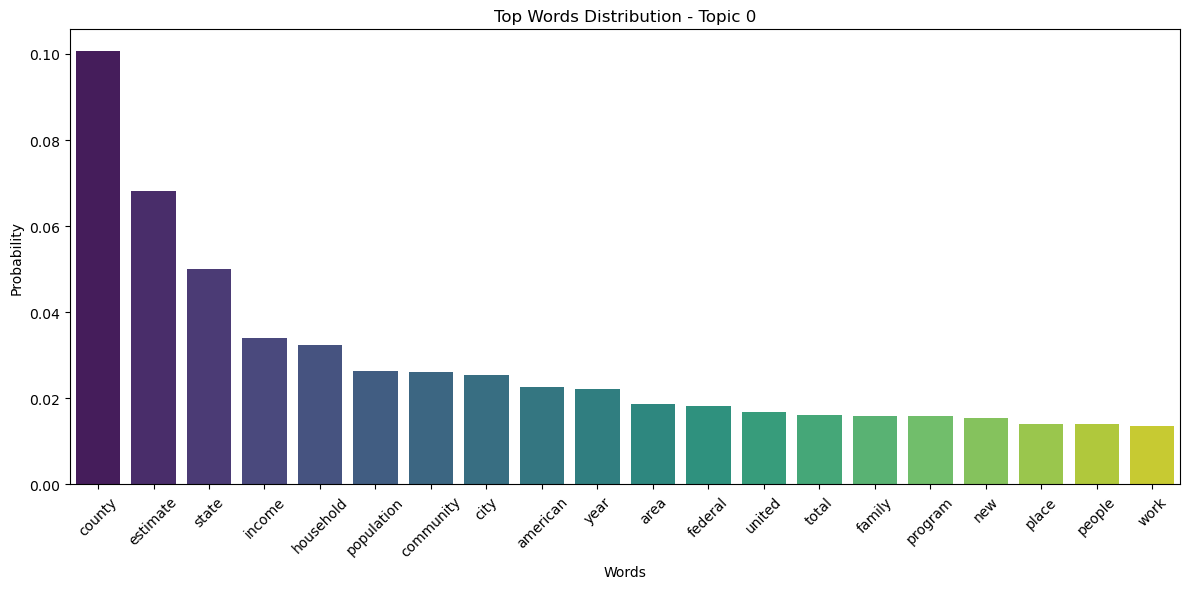

In [16]:
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting

# Plotting the distributions
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot_0, x='Word', y='Probability', palette='viridis')

# Add title and labels
plt.title('Top Words Distribution - Topic 0')
plt.xlabel('Words')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

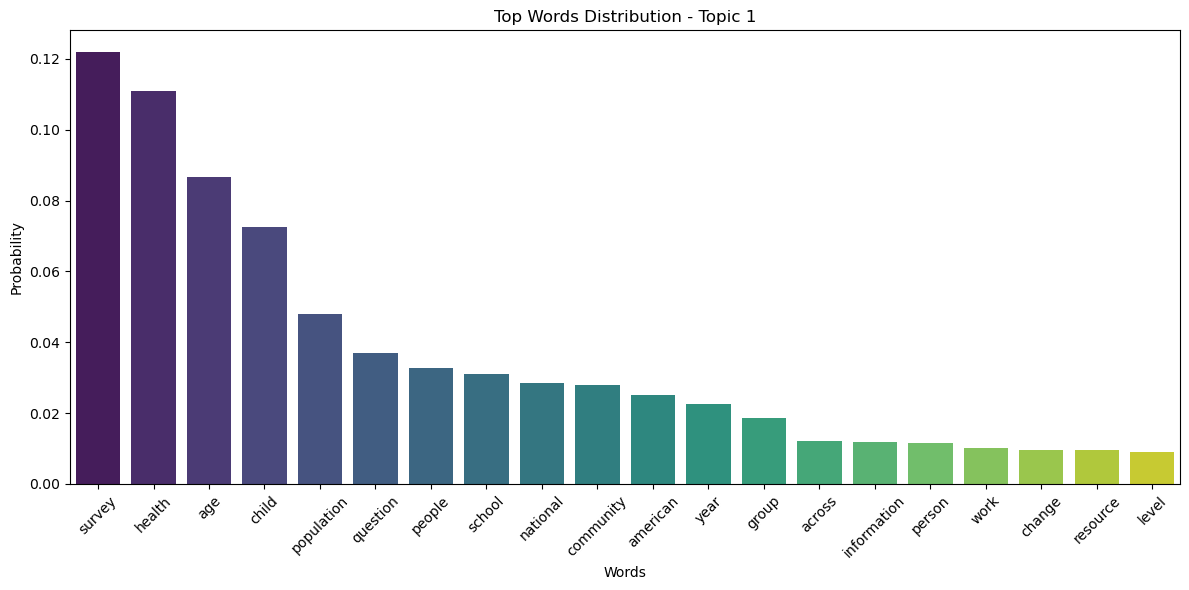

In [17]:
# Plotting the distributions
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot_1, x='Word', y='Probability', palette='viridis')

# Add title and labels
plt.title('Top Words Distribution - Topic 1')
plt.xlabel('Words')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

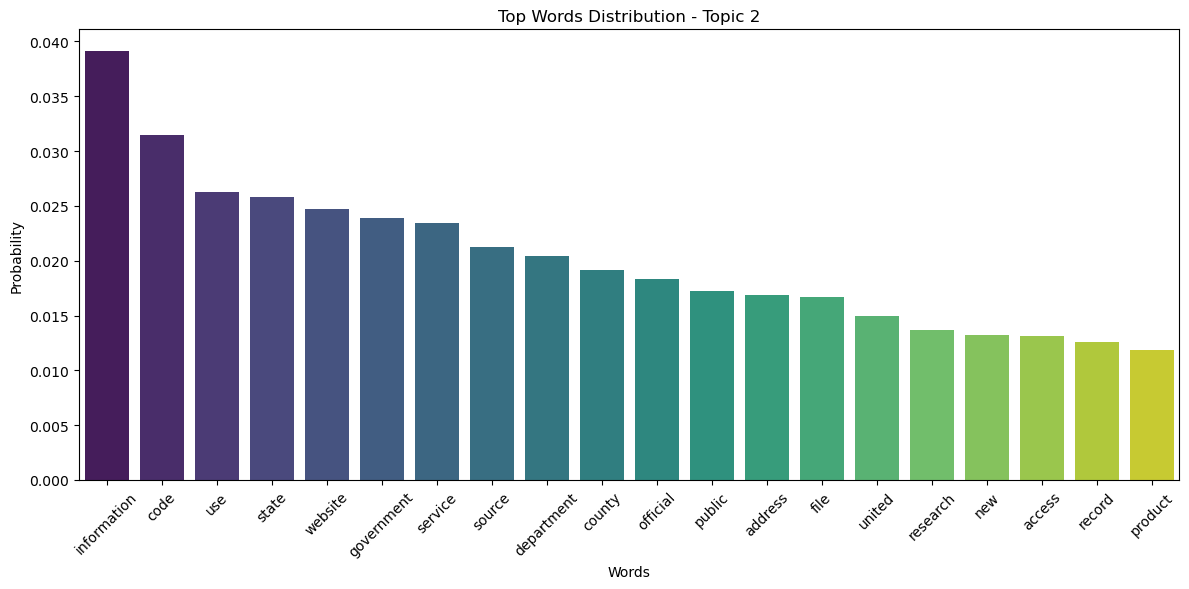

In [18]:
# Plotting the distributions
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot_2, x='Word', y='Probability', palette='viridis')

# Add title and labels
plt.title('Top Words Distribution - Topic 2')
plt.xlabel('Words')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

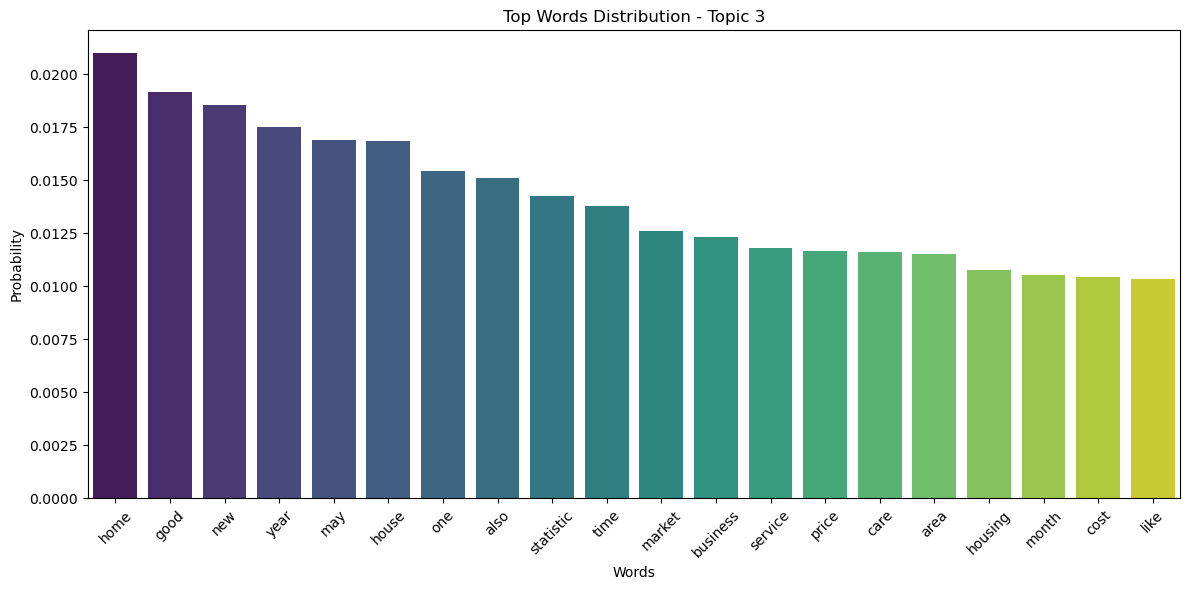

In [19]:
# Plotting the distributions
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot_3, x='Word', y='Probability', palette='viridis')

# Add title and labels
plt.title('Top Words Distribution - Topic 3')
plt.xlabel('Words')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
#Probability of each document per topic
cols = ["Topic_" + str(each) for each in range(lda.n_components)]
docs = ["Document_" + str(each) for each in range(X.shape[0])]

df_topics = pd.DataFrame(np.round(doc_topics,2),
                         columns=cols,
                         index=docs)

df_topics

,Topic_0,Topic_1,Topic_2,Topic_3
Document_0,0.07,0.00,0.00,0.93
Document_1,0.06,0.00,0.03,0.91
Document_2,0.00,0.01,0.61,0.38
Document_3,0.33,0.03,0.20,0.44
Document_4,0.01,0.12,0.73,0.15
...,...,...,...,...
Document_323,0.17,0.00,0.00,0.83
Document_324,0.14,0.02,0.10,0.74
Document_325,0.04,0.02,0.38,0.56
Document_326,0.42,0.01,0.57,0.01


In [21]:
#Assigning each document the topic with the highest probability
imp_topic = np.argmax(df_topics.values, axis=1)
df_topics["top_topic"] = imp_topic
print(df_topics.head(10))

            Topic_0  Topic_1  Topic_2  Topic_3  top_topic
Document_0     0.07     0.00     0.00     0.93          3
Document_1     0.06     0.00     0.03     0.91          3
Document_2     0.00     0.01     0.61     0.38          2
Document_3     0.33     0.03     0.20     0.44          3
Document_4     0.01     0.12     0.73     0.15          2
Document_5     0.12     0.03     0.17     0.68          3
Document_6     0.00     0.00     0.89     0.10          2
Document_7     0.01     0.01     0.74     0.24          2
Document_8     0.20     0.00     0.00     0.80          3
Document_9     0.27     0.01     0.54     0.18          2


In [22]:
#Adding topics into original DF
conditions = [df_topics["top_topic"] == 0, df_topics["top_topic"] == 1, df_topics["top_topic"] == 2, 
              df_topics["top_topic"] == 3]

choices = ["Community and Population Data", 
           "Health and Demographic Surveys", 
           "Public Records and Services", 
           "Business and Economic Indicators"]
final_data.loc[:,"Topic_Name"] = np.select(conditions, choices, default="Other")

final_data

,url,Found Links,Source,content,Topic_Name
0,http://bonddad.blogspot.com/2021/12/manufactur...,[http://www.census.gov/econ/www/],cited,the bonddad blog manufacturing still red hot c...,Business and Economic Indicators
1,http://bonddad.blogspot.com/2023/09/initial-jo...,[http://www.census.gov/econ/www/],cited,the bonddad blog initial jobless claim remain ...,Business and Economic Indicators
2,http://bostongis.org/?content_name=umn_datasou...,[http://www.census.gov/geo/www/tiger/index.htm...,cited,ogr odbcboston geographic information systemsh...,Public Records and Services
3,http://colonialsense.com/society-lifestyle/cen...,[mailto:?subject=colonial sense: society-lifes...,cited,colonial sense societylifestyle census governa...,Business and Economic Indicators
4,http://fileformats.archiveteam.org/index.php?t...,[https://www.census.gov/programs-surveys/cps.h...,cited,cps project just solve the file format problem...,Public Records and Services
...,...,...,...,...,...
323,https://www.withdra.com/p/mind-the-gap-explori...,[https://www.census.gov/library/publications/2...,cited,vibecession exploring the growing divide betwe...,Business and Economic Indicators
324,https://www.wxpr.org/2022-07-28/these-hurrican...,[https://data.census.gov/],repackaged,these hurricane flood map reveal the climate f...,Business and Economic Indicators
325,https://www.wyomingpublicmedia.org/news/2021-0...,[https://www.census.gov/data/experimental-data...,repackaged,single mother bore brunt of coronavirus anxiet...,Business and Economic Indicators
326,https://yelmwa.gov/i_want_to/contact/send_a_no...,[https://2020census.gov/en],cited,welcome to yelm washingtonskip to contentsearc...,Public Records and Services


In [23]:
# Simple count of topics
final_data['Topic_Name'].value_counts()

Business and Economic Indicators    154
Public Records and Services          96
Community and Population Data        68
Health and Demographic Surveys       10
Name: Topic_Name, dtype: int64

In [24]:
# split data into repackaged and cited instances
final_data_repackaged = final_data[final_data['Source']=='repackaged']
final_data_cited = final_data[final_data['Source']=='cited']


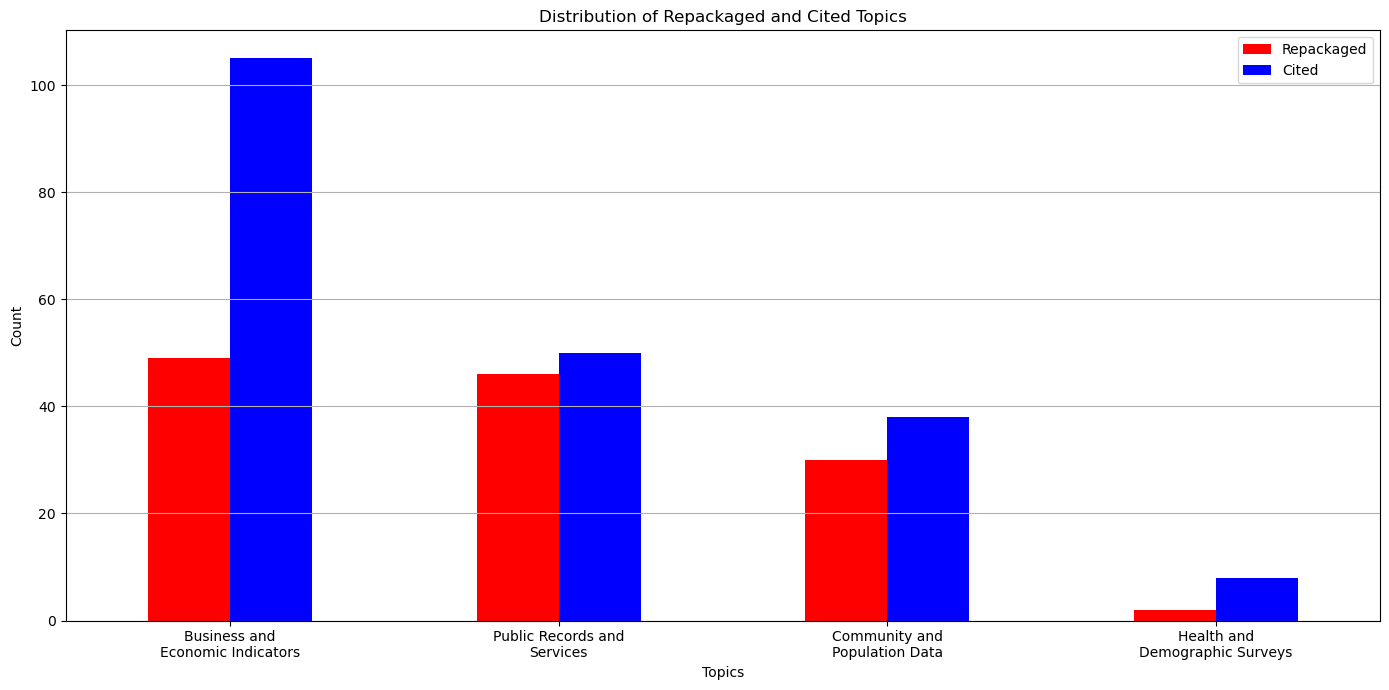

In [29]:
import textwrap # wrap axis label


# Assuming final_data_repackaged and final_data_cited are already defined DataFrames

# Get the value counts for repackaged topics
repackaged_topic_counts = final_data_repackaged['Topic_Name'].value_counts()

# Get the value counts for cited topics
cited_topic_counts = final_data_cited['Topic_Name'].value_counts()

# Combine the two series into a DataFrame
combined_counts = pd.DataFrame({
    'Repackaged': repackaged_topic_counts,
    'Cited': cited_topic_counts
}).fillna(0)

# Define distinct colors for repackaged and cited bars
colors = ['red', 'blue']  # Red for Repackaged, Blue for Cited

# Wrap the x-axis labels
wrapped_labels = [textwrap.fill(label, width=20) for label in combined_counts.index]

# Create a bar chart with grouped bars
fig, ax = plt.subplots(figsize=(14, 7))
combined_counts.plot(kind='bar', color=colors, ax=ax)
ax.set_title('Distribution of Repackaged and Cited Topics')
ax.set_xlabel('Topics')
ax.set_ylabel('Count')
ax.set_xticks(range(len(wrapped_labels)))
ax.set_xticklabels(wrapped_labels, rotation=0)
ax.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

## Mapping

### Repackaged

In [ ]:
# mapping packages
from geopy.geocoders import Nominatim
from tqdm import tqdm
import re
import socket
import time
from ip2geotools.databases.noncommercial import DbIpCity
import idna

# This code can sometimes not work due to completing too many api requests

# Function to get the details of the IP address including city, country, coordinates, etc.
def get_details(ip):
    res = DbIpCity.get(ip, api_key="free")
    return {
        "IP Address": res.ip_address,
        "City": res.city,
        "Region": res.region,
        "Country": res.country,
        "latitude": res.latitude, # we will get errors for latitude and longitude; this is resolved in the next step
        "longitude": res.longitude
    }

# Function to process a list of URLs and save the results into a DataFrame
def process_urls(urls):
    data = []
    for url in urls:
        try:
            domain = url.split('//')[-1].split('/')[0]
            ip_add = socket.gethostbyname(domain)
            details = get_details(ip_add)
            details["URL"] = url
            data.append(details)
            time.sleep(1)  # Add delay to prevent rate limiting
        except socket.gaierror:
            print(f"Could not resolve {url}: DNS resolution failed")
        except idna.core.IDNAError as e:
            print(f"Could not process {url}: {e}")
        except Exception as e:
            print(f"Could not process {url}: {e}")

    df = pd.DataFrame(data)
    return df

# List of URLs to process
urls_repackaged = final_data_repackaged['url']
urls_repackaged = list(set(urls_repackaged)) # remove duplicate urls

# Process each URL and save the results into a DataFrame
map_df_repackaged = process_urls(urls_repackaged)
print(map_df_repackaged)

Could not resolve https://www.boronsambo379.sbs/w/index.php?title=the_old_kingdom&action=edit&section=30: DNS resolution failed
Could not resolve https://hcup-us.ahrq.gov:443/reports/statbriefs/sb138.jsp: DNS resolution failed
          IP Address                                 City        Region  \
0    104.193.108.123           Atlanta (Peachtree Center)       Georgia   
1     173.223.60.166                       Lithia Springs       Georgia   
2      184.87.34.126                       Lithia Springs       Georgia   
3      184.87.40.196                       Lithia Springs       Georgia   
4     206.223.139.13                           Harrisburg  Pennsylvania   
..               ...                                  ...           ...   
120    81.169.145.79  Berlin (Charlottenburg-Wilmersdorf)        Berlin   
121   199.34.229.100           Oakland (Downtown Oakland)    California   
122  162.254.252.238                            Cleveland          Ohio   
123   64.233.185.121   

In [31]:
map_df_repackaged['City'] = map_df_repackaged['City'].apply(lambda x: re.sub(r'\(.*?\)', '', x).strip()) # removing data in parenthesis for city so we can get lat and long

# Initialize the geolocator
geolocator = Nominatim(user_agent="capstone_data_pull2")

# Function to get latitude and longitude
def get_lat_long(city, region, country):
    location = geolocator.geocode(f"{city}, {region}, {country}", timeout=10)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

for index, row in tqdm(map_df_repackaged.iterrows(), total=map_df_repackaged.shape[0]):
    latitude, longitude = get_lat_long(row['City'], row['Region'], row['Country'])
    map_df_repackaged.at[index, 'latitude'] = latitude
    map_df_repackaged.at[index, 'longitude'] = longitude

100%|██████████| 125/125 [01:47<00:00,  1.17it/s]


In [32]:
# Renaming the column
map_df_repackaged.rename(columns={'URL': 'url'}, inplace=True)

# Merge the DataFrames on the 'URL' column
map_df_repackaged_merged = pd.merge(map_df_repackaged, final_data_repackaged, on='url', how='inner')
map_df_repackaged_merged

,IP Address,City,Region,Country,latitude,longitude,url,Found Links,Source,content,Topic_Name
0,104.193.108.123,Atlanta,Georgia,US,33.748992,-84.390264,https://www.randomacts.org/kindness-stories/ra...,[https://www.census.gov/quickfacts/lawrencecit...,repackaged,random act board member help feed family with ...,Community and Population Data
1,173.223.60.166,Lithia Springs,Georgia,US,33.793995,-84.660490,https://www.census.gov/construction/chars/defi...,[https://www.census.gov/about/contact-us/socia...,repackaged,characteristic of new housing definitionsthis ...,Business and Economic Indicators
2,184.87.34.126,Lithia Springs,Georgia,US,33.793995,-84.660490,https://www.bts.gov/content/principal-means-tr...,[https://www.census.gov/programs-surveys/acs/d...,repackaged,principal mean of transportation to work burea...,Public Records and Services
3,184.87.40.196,Lithia Springs,Georgia,US,33.793995,-84.660490,https://www.kennedy.senate.gov/public/2023/3/k...,[https://www.census.gov/quickfacts/la],repackaged,kennedy stop and frisk is constitutional let n...,Business and Economic Indicators
4,206.223.139.13,Harrisburg,Pennsylvania,US,40.266311,-76.886112,https://www.adamscountypa.gov/departments/comm...,"[https://data.census.gov/profile/adams_county,...",repackaged,press alt1 for screenreader mode alt0 to cance...,Public Records and Services
...,...,...,...,...,...,...,...,...,...,...,...
120,81.169.145.79,Berlin,Berlin,DE,52.510382,13.434911,https://comecon.media/background/grammy-awards...,[https://www.census.gov/programs-surveys/asm.h...,repackaged,grammy award u census bureau publishes industr...,Business and Economic Indicators
121,199.34.229.100,Oakland,California,US,37.804456,-122.271356,https://www.oceansidechamber.com/oceanside-blo...,[https://www.census.gov/quickfacts/oceansideci...,repackaged,from refugee to a businesswoman an american su...,Business and Economic Indicators
122,162.254.252.238,Cleveland,Ohio,US,41.499657,-81.693677,https://hopewelltwp.com/documents/resolution-r...,[https://www.census.gov/quickfacts/beavercount...,repackaged,skip to contentskip to main navigationskip to ...,Public Records and Services
123,64.233.185.121,Mountain View,California,US,37.389389,-122.083210,https://www.bauaw.org/2017/03/bauaw2003-bauaw-...,[https://factfinder.census.gov/bkmk/table/1.0/...,repackaged,bauaw newsletter bauaw2003 bauaw newsletter th...,Business and Economic Indicators


In [33]:
#Mapping data
import plotly.graph_objects as go

# Define a color map for the topics
color_map = {
    'Community and Population Data': 'blue',
    'Health and Demographic Surveys': 'purple',
    'Public Records and Services': 'red',
    'Business and Economic Indicators': 'pink',
    'Other': 'gray'
}

# Map the Topic_Name to colors
map_df_repackaged_merged['color'] = map_df_repackaged_merged['Topic_Name'].map(color_map)

# Create the scatter geo plot
fig = go.Figure(data=go.Scattergeo(
    lon=map_df_repackaged_merged['longitude'],
    lat=map_df_repackaged_merged['latitude'],
    mode='markers',
    text=map_df_repackaged_merged['url'],
    hoverinfo='text',
    marker=dict(color=map_df_repackaged_merged['color'], size=10, line=dict(width=1, color='black')),
    showlegend=False
))

# Update the layout to include a legend
fig.update_layout(
    title='Instances of Repackaged Census Data',
    geo_scope='north america',
    legend_title_text='Topics',
    legend=dict(
        itemsizing='constant'
    )
)

# Add legend items manually
for topic, color in color_map.items():
    fig.add_trace(go.Scattergeo(
        lon=[None], lat=[None],
        mode='markers',
        marker=dict(size=10, color=color),
        name=topic
    ))

# Show the plot
fig.show()

### Cited

In [35]:
# mapping packages
from geopy.geocoders import Nominatim
from tqdm import tqdm
import re
import socket
import time
from ip2geotools.databases.noncommercial import DbIpCity
import idna

# Function to get the details of the IP address including city, country, coordinates, etc.
def get_details(ip):
    res = DbIpCity.get(ip, api_key="free")
    return {
        "IP Address": res.ip_address,
        "City": res.city,
        "Region": res.region,
        "Country": res.country,
        "latitude": res.latitude, # we will get errors for latitude and longitude; this is resolved in the next step
        "longitude": res.longitude
    }

# Function to process a list of URLs and save the results into a DataFrame
def process_urls(urls):
    data = []
    for url in urls:
        try:
            domain = url.split('//')[-1].split('/')[0]
            ip_add = socket.gethostbyname(domain)
            details = get_details(ip_add)
            details["URL"] = url
            data.append(details)
            time.sleep(1)  # Add delay to prevent rate limiting
        except socket.gaierror:
            print(f"Could not resolve {url}: DNS resolution failed")
        except idna.core.IDNAError as e:
            print(f"Could not process {url}: {e}")
        except Exception as e:
            print(f"Could not process {url}: {e}")

    df = pd.DataFrame(data)
    return df

# List of URLs to process
urls_cited = final_data_cited['url']
urls_cited = list(set(urls_cited)) # remove duplicate urls

# Process each URL and save the results into a DataFrame
map_df_cited = process_urls(urls_cited)
print(map_df_cited)

        IP Address           City      Region Country   latitude   longitude  \
0    142.250.9.121  Mountain View  California      US  37.389389 -122.083210   
1    13.107.253.41        Toronto     Ontario      CA  43.653482  -79.383935   
2    74.125.21.121  Mountain View  California      US  37.389389 -122.083210   
3    104.26.13.157        Toronto     Ontario      CA  43.653482  -79.383935   
4     104.18.11.72        Toronto     Ontario      CA  43.653482  -79.383935   
..             ...            ...         ...     ...        ...         ...   
196  151.101.13.68       Secaucus  New Jersey      US  40.789929  -74.056674   
197   161.35.188.4        Clifton  New Jersey      US  40.858433  -74.163755   
198   12.133.50.83     Tuscaloosa     Alabama      US  33.209561  -87.567526   
199  172.67.143.93        Toronto     Ontario      CA  43.653482  -79.383935   
200   104.18.36.24        Toronto     Ontario      CA  43.653482  -79.383935   

                                       

In [36]:
map_df_cited['City'] = map_df_cited['City'].apply(lambda x: re.sub(r'\(.*?\)', '', x).strip()) # removing data in parenthesis for city so we can get lat and long

# Initialize the geolocator
geolocator = Nominatim(user_agent="capstone_data_pull2")

# Function to get latitude and longitude
def get_lat_long(city, region, country):
    location = geolocator.geocode(f"{city}, {region}, {country}", timeout=10)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

for index, row in tqdm(map_df_cited.iterrows(), total=map_df_cited.shape[0]):
    latitude, longitude = get_lat_long(row['City'], row['Region'], row['Country'])
    map_df_cited.at[index, 'latitude'] = latitude
    map_df_cited.at[index, 'longitude'] = longitude

100%|██████████| 201/201 [03:10<00:00,  1.05it/s]


In [37]:
# Renaming the column
map_df_cited.rename(columns={'URL': 'url'}, inplace=True)

# Merge the DataFrames on the 'URL' column
map_df_cited_merged = pd.merge(map_df_cited, final_data_cited, on='url', how='inner')
map_df_cited_merged

,IP Address,City,Region,Country,latitude,longitude,url,Found Links,Source,content,Topic_Name
0,142.250.9.121,Mountain View,California,US,37.389389,-122.083210,http://www.andrewtrumper.com/2008/01/war-is-no...,[http://www.census.gov/main/www/popclock.html],cited,arbitrary thought war is not cheapskip to main...,Business and Economic Indicators
1,13.107.253.41,Toronto,Ontario,CA,43.653482,-79.383935,https://cornerstonewealth.biz/resources/articl...,[https://www.census.gov/library/publications/2...,cited,starting a family the total cost of a baby in ...,Business and Economic Indicators
2,74.125.21.121,Mountain View,California,US,37.389389,-122.083210,http://www.justupthepike.com/2012/06/building-...,[http://www.census.gov/statab/hist/hs-12.pdf],cited,just up the pikewednesday june 27 2012building...,Business and Economic Indicators
3,104.26.13.157,Toronto,Ontario,CA,43.653482,-79.383935,https://www.homesnacks.com/best-counties-in-te...,[https://www.census.gov/programs-surveys/acs/],cited,10 best county to live in texas 2024 homesnack...,Community and Population Data
4,104.18.11.72,Toronto,Ontario,CA,43.653482,-79.383935,https://www.immihelp.com/h1b-visa-sponsors/3i_...,[https://www.census.gov/naics/?year=2007&input...,cited,3i infotech inc in edison nj past h1b visa spo...,Public Records and Services
...,...,...,...,...,...,...,...,...,...,...,...
196,151.101.13.68,Secaucus,New Jersey,US,40.789929,-74.056674,https://www.upworthy.com/what-i-said-to-god-af...,[https://www.census.gov/prod/cen2010/reports/c...,cited,what i said to god after the san bernardino ma...,Business and Economic Indicators
197,161.35.188.4,Clifton,New Jersey,US,40.858433,-74.163755,https://www.dorsey-co.com/beat-em-and-join-em-...,[https://www.census.gov/library/stories/2022/0...,cited,beat em and join em online retail neednt be th...,Business and Economic Indicators
198,12.133.50.83,Tuscaloosa,Alabama,US,33.209561,-87.567526,https://www.putnamgeneral.com/getpage.php?name...,[https://factfinder.census.gov/faces/nav/jsf/p...,cited,our communityskip navigationonline billpaypric...,Community and Population Data
199,172.67.143.93,Toronto,Ontario,CA,43.653482,-79.383935,https://off-guardian.org/2022/01/22/hiding-the...,[https://www.census.gov/library/stories/2017/1...,cited,hiding the body offguardiansearchjan 22 202224...,Business and Economic Indicators


In [38]:
# Define a color map for the topics
color_map = {
    'Community and Population Data': 'blue',
    'Health and Demographic Surveys': 'purple',
    'Public Records and Services': 'red',
    'Business and Economic Indicators': 'pink',
    'Other': 'gray'
}


# Map the Topic_Name to colors
map_df_cited_merged['color'] = map_df_cited_merged['Topic_Name'].map(color_map)

# Create the scatter geo plot
fig = go.Figure(data=go.Scattergeo(
    lon=map_df_cited_merged['longitude'],
    lat=map_df_cited_merged['latitude'],
    mode='markers',
    text=map_df_cited_merged['url'],
    hoverinfo='text',
    marker=dict(color=map_df_cited_merged['color'], size=10, line=dict(width=1, color='black')),
    showlegend=False
))

# Update the layout to include a legend
fig.update_layout(
    title='Instances of Cited Census Data',
    geo_scope='north america',
    legend_title_text='Topics',
    legend=dict(
        itemsizing='constant'
    )
)

# Add legend items manually
for topic, color in color_map.items():
    fig.add_trace(go.Scattergeo(
        lon=[None], lat=[None],
        mode='markers',
        marker=dict(size=10, color=color),
        name=topic
    ))

# Show the plot
fig.show()

## Seed Link Analysis

In [212]:
r_url = final_data_repackaged['url'].tolist()
c_url = final_data_cited['url'].tolist()

Repackaged

In [213]:
# Parsing links and creating a dataframe
from urllib.parse import urlparse # parse out urls

seed_parsed_url = []

for url in r_url:
    seed_parsed = urlparse(url)
    seed_parsed_url.append({
        "URL": url,
        "Scheme": seed_parsed.scheme,
        "Netloc": seed_parsed.netloc,
        "Path": seed_parsed.path,
        "Query": seed_parsed.query
    })

# Convert the list of dictionaries to a DataFrame
r_seed_parsed_links = pd.DataFrame(seed_parsed_url)

In [214]:
# Filter out any row in paths that has NA or only a / in it 
r_seed_parsed_links = r_seed_parsed_links.replace('', pd.NA).dropna(subset=['Path'])
r_seed_parsed_links = r_seed_parsed_links[r_seed_parsed_links['Path'] != '/']

print(r_seed_parsed_links)

                                                   URL Scheme  \
0    http://li558-193.members.linode.com/index.php?...   http   
1    http://www.tuscco.com/event/tuscaloosa-county-...   http   
2    https://929thebull.com/spill-the-beans-rumors-...  https   
3    https://97x.com/kansas-officials-catch-someone...  https   
4    https://alfred.stlouisfed.org/series?seid=puaa...  https   
..                                                 ...    ...   
122            https://www.wakeforestnc.gov/file/10549  https   
123                https://www.wikidata.org/wiki/q1546  https   
124              https://www.wikidata.org/wiki/q578055  https   
125  https://www.wxpr.org/2022-07-28/these-hurrican...  https   
126  https://www.wyomingpublicmedia.org/news/2021-0...  https   

                           Netloc  \
0    li558-193.members.linode.com   
1                  www.tuscco.com   
2                  929thebull.com   
3                         97x.com   
4           alfred.stlouisfed.org 

In [215]:
netloc_distribution = r_seed_parsed_links['Netloc'].value_counts()
print("Netloc distribution:")
print(netloc_distribution)

Netloc distribution:
Netloc
catalog.data.gov                   7
hopewelltwp.com                    5
cuyahogacounty.gov                 4
www.incomebyzipcode.com            4
memberportal.keywestchamber.org    3
                                  ..
libguides.luc.edu                  1
libguides.csun.edu                 1
libguides.columbiasouthern.edu     1
kingfm.com                         1
www.wyomingpublicmedia.org         1
Name: count, Length: 105, dtype: int64


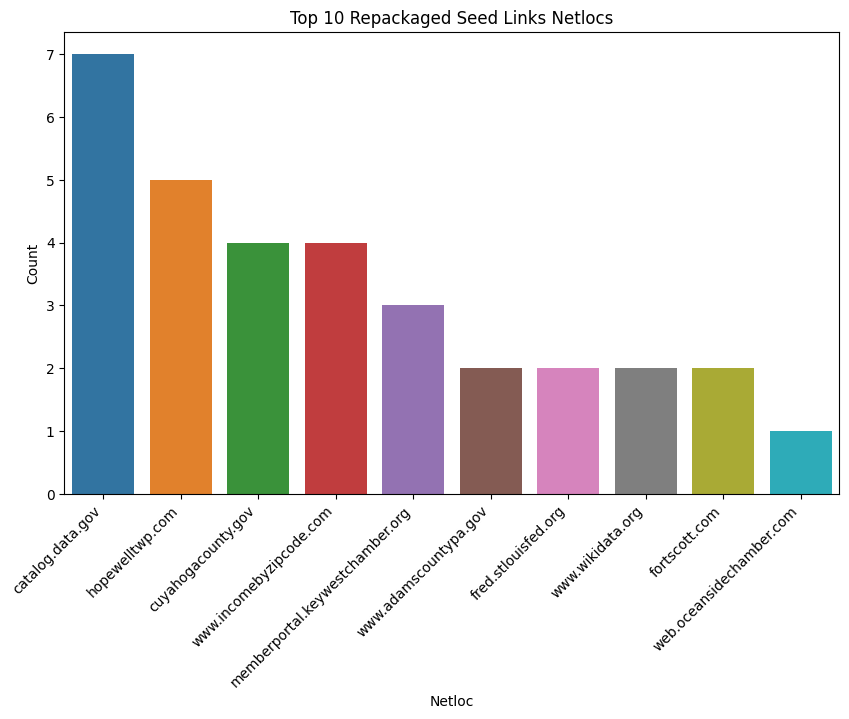

In [216]:
# Plot netloc distribution (top 10)
plt.figure(figsize=(10, 6))
top_netlocs = r_seed_parsed_links['Netloc'].value_counts().nlargest(10)
sns.barplot(x=top_netlocs.index, y=top_netlocs.values)
plt.title('Top 10 Repackaged Seed Links Netlocs')
plt.xlabel('Netloc')
plt.ylabel('Count')
plt.xticks(rotation=45, ha = 'right')
plt.show()

Cited

In [217]:
# Parsing links and creating a dataframe
from urllib.parse import urlparse # parse out urls

c_seed_parsed_url = []

for url in c_url:
    c_seed_parsed = urlparse(url)
    c_seed_parsed_url.append({
        "URL": url,
        "Scheme": c_seed_parsed.scheme,
        "Netloc": c_seed_parsed.netloc,
        "Path": c_seed_parsed.path,
        "Query": c_seed_parsed.query
    })

# Convert the list of dictionaries to a DataFrame
c_seed_parsed_links = pd.DataFrame(c_seed_parsed_url)

In [218]:
# Filter out any row in paths that has NA or only a / in it 
c_seed_parsed_links = c_seed_parsed_links.replace('', pd.NA).dropna(subset=['Path'])
c_seed_parsed_links = c_seed_parsed_links[c_seed_parsed_links['Path'] != '/']

print(c_seed_parsed_links)

                                                   URL Scheme  \
0    http://bonddad.blogspot.com/2021/12/manufactur...   http   
1    http://bonddad.blogspot.com/2023/09/initial-jo...   http   
3    http://colonialsense.com/society-lifestyle/cen...   http   
4    http://fileformats.archiveteam.org/index.php?t...   http   
6    http://labor.state.vt.us/employer.cfm?stfips=5...   http   
..                                                 ...    ...   
196  https://www.wgbh.org/news/national/2019-10-14/...  https   
197  https://www.wikiwand.com/en/2011_united_kingdo...  https   
198  https://www.withdra.com/p/mind-the-gap-explori...  https   
199  https://yelmwa.gov/i_want_to/contact/send_a_no...  https   
200        https://yelmwa.gov/news_detail_t10_r448.php  https   

                          Netloc  \
0           bonddad.blogspot.com   
1           bonddad.blogspot.com   
3              colonialsense.com   
4    fileformats.archiveteam.org   
6              labor.state.vt.us   
.. 

In [219]:
netloc_distribution = c_seed_parsed_links['Netloc'].value_counts()
print("Netloc distribution:")
print(netloc_distribution)

Netloc distribution:
Netloc
alfred.stlouisfed.org      11
fred.stlouisfed.org        11
statisticalatlas.com       10
reddragonleo.com            4
bonddad.blogspot.com        3
                           ..
horasis.org                 1
hardingnj.org               1
guides.wpunj.edu            1
grocerants.blogspot.com     1
otisandjames.com            1
Name: count, Length: 139, dtype: int64


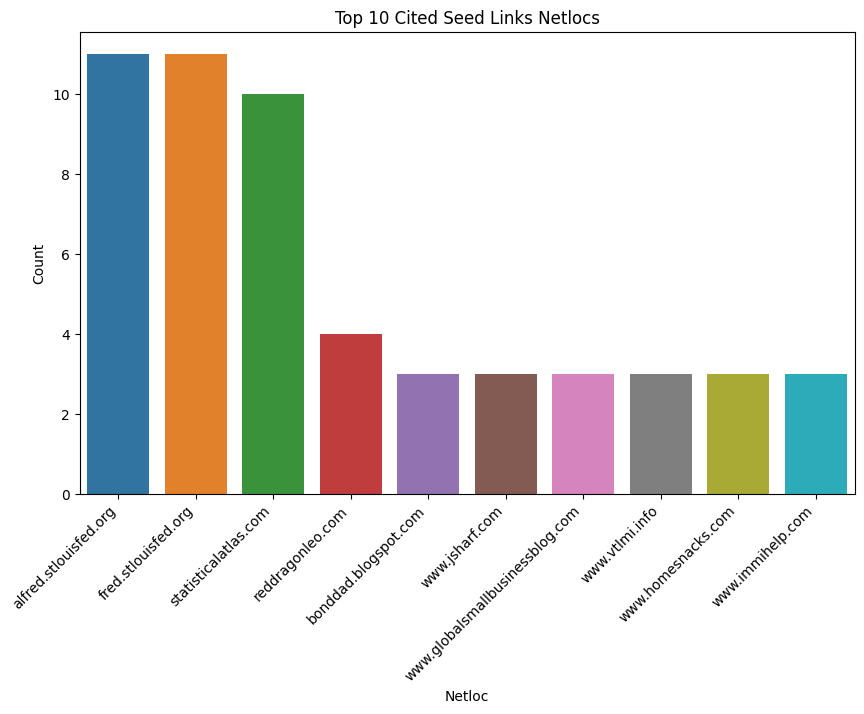

In [220]:
# Plot netloc distribution (top 10)
plt.figure(figsize=(10, 6))
top_netlocs = c_seed_parsed_links['Netloc'].value_counts().nlargest(10)
sns.barplot(x=top_netlocs.index, y=top_netlocs.values)
plt.title('Top 10 Cited Seed Links Netlocs')
plt.xlabel('Netloc')
plt.ylabel('Count')
plt.xticks(rotation=45, ha = 'right')
plt.show()

## USCB Link Parsing

In [221]:
from urllib.parse import urlparse # parse out urls

#Saving Found Links into a list for later analysis
urls = foundlinks['Found Links'].tolist()

# Filter out URLs that are just 'census.gov' or 'census.gov/'
filtered_urls = [
    url for url in urls 
    if not (urlparse(url).netloc == 'www.census.gov' and (urlparse(url).path == '' or urlparse(url).path == '/'))
]

len(filtered_urls)

692

In [222]:
#Identify patterns for repackaged links
data_tables_patterns = ['table', 'dataset', 'data', 'productview']
repackaged_data_tables_urls = [url for url in filtered_urls if any(pattern in url for pattern in data_tables_patterns)]
cited_data_tables_urls = [url for url in filtered_urls if not any(pattern in url for pattern in data_tables_patterns)]

In [223]:
#Grabbing number of links
len(repackaged_data_tables_urls)

188

In [224]:
#Grabbing number of links
len(cited_data_tables_urls)

504

### Repackaged

In [225]:
# Parsing links and creating a dataframe

r_parsed = []

for url in repackaged_data_tables_urls:
    parsed_url = urlparse(url)
    r_parsed.append({
        "URL": url,
        "Scheme": parsed_url.scheme,
        "Netloc": parsed_url.netloc,
        "Path": parsed_url.path,
        "Query": parsed_url.query
    })

# Convert the list of dictionaries to a DataFrame
r_parsed_links = pd.DataFrame(r_parsed)

In [226]:
# Filter out any row in paths that has NA or only a / in it 
r_parsed_links = r_parsed_links.replace('', pd.NA).dropna(subset=['Path'])
r_parsed_links = r_parsed_links[r_parsed_links['Path'] != '/']

print(r_parsed_links)

                                                   URL Scheme  \
0    https://www.census.gov/quickfacts/fact/table/t...  https   
1    https://www.census.gov/data/tables/time-series...  https   
2    https://web.archive.org/web/20141006102418/htt...  https   
3    http://factfinder2.census.gov/faces/tableservi...   http   
4    http://www.census.gov/compendia/statab/2012/ta...   http   
..                                                 ...    ...   
183  https://www.census.gov/quickfacts/fact/table/h...  https   
184         http://www.census.gov/data/data-tools.html   http   
185         http://www.census.gov/data/data-tools.html   http   
186         http://www.census.gov/data/data-tools.html   http   
187  https://www.census.gov/programs-surveys/acs/da...  https   

                     Netloc  \
0            www.census.gov   
1            www.census.gov   
2           web.archive.org   
3    factfinder2.census.gov   
4            www.census.gov   
..                      ...   
18

In [228]:
# Count the number of URLs
url_count = r_parsed_links['URL'].count()
print(f"Total number of URLs: {url_count}")

# Count the number of unique schemes
unique_schemes = r_parsed_links['Scheme'].nunique()
print(f"Number of unique schemes: {unique_schemes}")

# Count the number of unique netlocs
unique_netlocs = r_parsed_links['Netloc'].nunique()
print(f"Number of unique netlocs: {unique_netlocs}")

# Count the number of unique Paths
unique_paths = r_parsed_links['Path'].nunique()
print(f"Number of unique Paths: {unique_paths}")

Total number of URLs: 178
Number of unique schemes: 3
Number of unique netlocs: 9
Number of unique Paths: 93


In [229]:
# Extracting additional insights
from collections import Counter

# 1. Identify the most common URL paths
r_paths = r_parsed_links['Path']
r_path_counts = Counter(r_paths)
r_most_common_paths = r_path_counts.most_common(15)

print("\nMost common Repackaged URL paths:")
for path, count in r_most_common_paths:
    print(f"{path}: {count}")


Most common Repackaged URL paths:
/cedsci/table: 14
/quickfacts/fact/table/us/pst045222: 12
/web/20111028064539/http://2010.census.gov/2010census/data/apportionment-pop-text.php: 11
/cedsci/: 9
/quickfacts/fact/table/keywestcityflorida,putnamcountyflorida/pst045221: 8
/quickfacts/fact/table/cuyahogacountyohio/pst045219: 5
/data/software/x13as.html: 4
/foreign-trade/data/index.html: 4
/all: 4
/data/tables/time-series/demo/geographic-mobility/state-to-state-migration.html: 3
/cedsci/all: 3
/data/data-tools.html: 3
/quickfacts/fact/table/broomecountynewyork/pst045219: 2
/data/existing/decennial/geo/gpmb/tigerline/tiger2019/roads/tl_2019_roads.ea.iso.xml: 2
/data/existing/decennial/geo/gpmb/tigerline/archived_19110/tl_2020_roads.shp.ea.iso.xml: 2


In [230]:
tables, counts = zip(*r_most_common_paths)
# Create a DataFrame from the tables and counts
data = {'Census Table': tables, 'Number of References': counts}
df = pd.DataFrame(data)

# Create an interactive horizontal bar chart
fig = px.bar(df, 
             x='Number of References', 
             y='Census Table', 
             orientation='h',  # Horizontal bars
             title="Top 15 Most Referenced U.S. Census Paths in Repackaged Instances",
             labels={'Number of References': 'Number of References', 'Census Table': 'Census Table'},
             color='Number of References',  # Color bars based on count
             text='Number of References')  # Show count on hover

# Customize the hover data (you can modify this to include more details)
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Invert the y-axis to show the highest count at the top
fig.update_yaxes(categoryorder='total descending')

# Show the interactive plot
fig.show()

In [231]:
netloc_distribution = r_parsed_links['Netloc'].value_counts()
print("Netloc distribution:")
print(netloc_distribution)

Netloc distribution:
Netloc
www.census.gov            102
data.census.gov            36
web.archive.org            12
factfinder.census.gov      11
meta.geo.census.gov         8
www2.census.gov             4
factfinder2.census.gov      1
www.census.gov.ph           1
archive.today               1
Name: count, dtype: int64


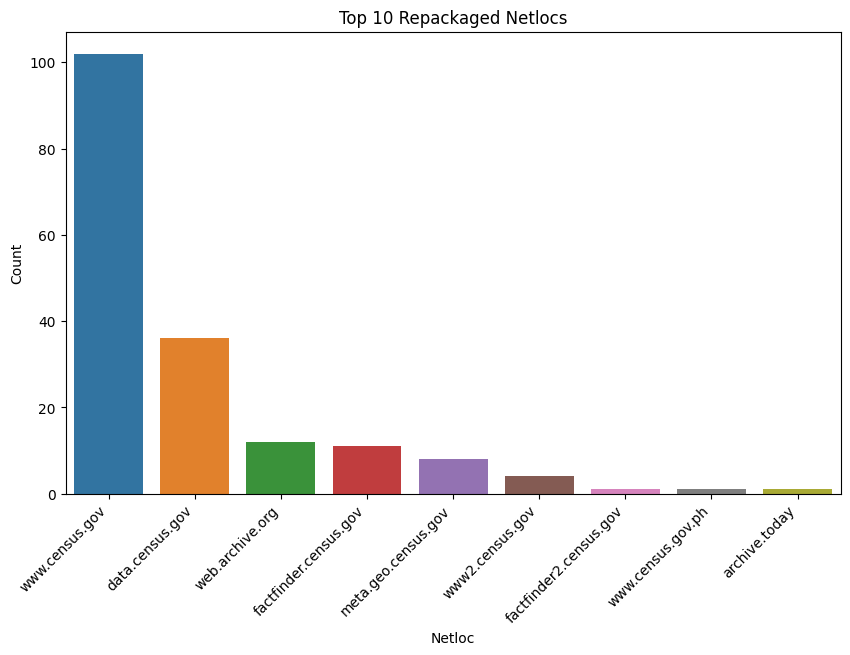

In [232]:
# Plot netloc distribution (top 10)
plt.figure(figsize=(10, 6))
top_netlocs = r_parsed_links['Netloc'].value_counts().nlargest(10)
sns.barplot(x=top_netlocs.index, y=top_netlocs.values)
plt.title('Top 10 Repackaged Netlocs')
plt.xlabel('Netloc')
plt.ylabel('Count')
plt.xticks(rotation=45, ha = 'right')
plt.show()

In [233]:
r_query = r_parsed_links.replace('', pd.NA).dropna(subset=['Query'])
print(r_query)

                                                   URL Scheme  \
2    https://web.archive.org/web/20141006102418/htt...  https   
3    http://factfinder2.census.gov/faces/tableservi...   http   
5    https://data.census.gov/cedsci/table?q=s2901%3...  https   
6    https://data.census.gov/cedsci/table?q=age%20a...  https   
19   https://data.census.gov/table?g=0100000us&n=33...  https   
36   http://factfinder.census.gov/servlet/datasetma...   http   
37   http://factfinder.census.gov/servlet/datasetma...   http   
61   http://www.census.gov/econ/currentdata/dbsearc...   http   
62   http://www.census.gov/econ/currentdata/dbsearc...   http   
70   https://data.census.gov/cedsci/profile?g=16000...  https   
84       https://data.census.gov/cedsci/all?q=mortgage  https   
85   https://data.census.gov/cedsci/all?q=&g=310m40...  https   
91   https://data.census.gov/profile/adams_county,_...  https   
104  https://data.census.gov/cedsci/table?q=camilla...  https   
114  https://data.census.

Repackaged Query parameters distribution:
Query_Params
3    11
1    11
2     3
6     3
5     2
9     2
Name: count, dtype: int64


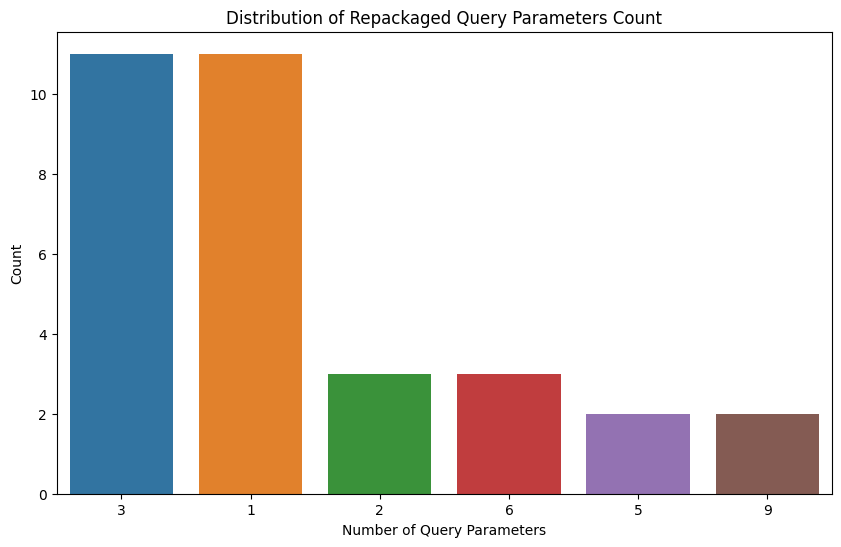

In [234]:
# Extract and count unique query parameters
r_query['Query_Params'] = r_query['Query'].apply(lambda x: len(x.split('&')) if x else 0)
query_params_distribution = r_query['Query_Params'].value_counts()
print("Repackaged Query parameters distribution:")
print(query_params_distribution)

# Plot query parameters distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=r_query, x='Query_Params', order=r_query['Query_Params'].value_counts().index)
plt.title('Distribution of Repackaged Query Parameters Count')
plt.xlabel('Number of Query Parameters')
plt.ylabel('Count')
plt.show()

In [235]:
# Extracting additional insights
from collections import Counter

# 1. Identify the most common URL paths
r_query = r_query['Query']
r_query_counts = Counter(r_query)
r_most_common_query = r_query_counts.most_common(15)

print("\nMost common Repackaged URL paths:")
for path, count in r_most_common_query:
    print(f"{path}: {count}")


Most common Repackaged URL paths:
t=income%20and%20poverty&g=0100000us,%241600000&tid=acsst5y2020.s1902: 3
pid=dec_10_sf1_gctph1.st13&prodtype=table: 2
_program=dec&_tabid=dec1&_submenuid=datasets_1&_lang=en&_ts=224246209722: 2
q=mortgage: 2
g=050xx00us42001: 2
q=age%20by%20state&g=0100000us.04000.001&tid=acsst1y2019.s0101&hidepreview=true&moe=false&tp=true: 2
d=acs%205-year%20estimates%20detailed%20tables: 2
t=populations%20and%20people&g=0100000us,%241600000&y=2020: 2
g=0100000us%241600000&y=2010&d=dec%20redistricting%20data%20%28pl%2094-171%29: 2
q=s2901%3a%20citizen,%20voting-age%20population%20by%20selected%20characteristics&g=0400000us37&tid=acsst1y2019.s2901: 1
q=age%20and%20sex&g=0400000us37&tid=acsst5y2019.s0101: 1
g=0100000us&n=339992&tid=asmarea2017.am1831basic01: 1
program=m3&startyear=2005&endyear=2015&categories=mtm&datatype=vs&geolevel=us&adjusted=1&notadjusted=1&submit=get+data: 1
program=m3&startyear=2005&endyear=2015&categories=mtm&datatype=no&geolevel=us&adjusted=1&

In [236]:
tables, counts = zip(*r_most_common_query)
# Create a DataFrame from the tables and counts
data = {'Census Table': tables, 'Number of References': counts}
df = pd.DataFrame(data)

# Create an interactive horizontal bar chart
fig = px.bar(df, 
             x='Number of References', 
             y='Census Table', 
             orientation='h',  # Horizontal bars
             title="Top 15 Most Referenced U.S. Census Queries in Repackaged Instances",
             labels={'Number of References': 'Number of References', 'Census Table': 'Census Table'},
             color='Number of References',  # Color bars based on count
             text='Number of References')  # Show count on hover

# Customize the hover data (you can modify this to include more details)
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Invert the y-axis to show the highest count at the top
fig.update_yaxes(categoryorder='total descending')

# Show the interactive plot
fig.show()

### Cited

In [237]:
#Parsing links and creating a dataframe

c_parsed = []

for url in cited_data_tables_urls:
    parsed_url = urlparse(url)
    c_parsed.append({
        "URL": url,
        "Scheme": parsed_url.scheme,
        "Netloc": parsed_url.netloc,
        "Path": parsed_url.path,
        "Query": parsed_url.query
    })

# Convert the list of dictionaries to a DataFrame
c_parsed_links = pd.DataFrame(c_parsed)

print(c_parsed_links)

                                                   URL  Scheme  \
0                      http://www.census.gov/econ/www/    http   
1                      http://www.census.gov/econ/www/    http   
2       http://www.census.gov/geo/www/tiger/index.html    http   
3     http://www.census.gov/geo/www/cob/bdy_files.html    http   
4    mailto:?subject=colonial sense: society-lifest...  mailto   
..                                                 ...     ...   
499                           https://2020census.gov./   https   
500             http://2010.census.gov/2010censusjobs/    http   
501   https://www.census.gov/prod/2013pubs/p20-570.pdf   https   
502  http://www.census.gov/hhes/www/poverty/newguid...    http   
503                          https://2020census.gov/en   https   

              Netloc                                Path  \
0     www.census.gov                          /econ/www/   
1     www.census.gov                          /econ/www/   
2     www.census.gov       

In [238]:
#Filter out any row in paths that has NA or only a / in it 
c_parsed_links = c_parsed_links.replace('', pd.NA).dropna(subset=['Path'])
c_parsed_links = c_parsed_links[c_parsed_links['Path'] != '/']

print(c_parsed_links)

                                                   URL Scheme  \
0                      http://www.census.gov/econ/www/   http   
1                      http://www.census.gov/econ/www/   http   
2       http://www.census.gov/geo/www/tiger/index.html   http   
3     http://www.census.gov/geo/www/cob/bdy_files.html   http   
5    https://twitter.com/intent/tweet/?text=colonia...  https   
..                                                 ...    ...   
498        http://www.census.gov/programs-surveys/acs/   http   
500             http://2010.census.gov/2010censusjobs/   http   
501   https://www.census.gov/prod/2013pubs/p20-570.pdf  https   
502  http://www.census.gov/hhes/www/poverty/newguid...   http   
503                          https://2020census.gov/en  https   

              Netloc                                Path  \
0     www.census.gov                          /econ/www/   
1     www.census.gov                          /econ/www/   
2     www.census.gov           /geo/www

In [239]:
# Count the number of URLs
url_count = c_parsed_links['URL'].count()
print(f"Total number of URLs: {url_count}")

# Count the number of unique schemes
unique_schemes = c_parsed_links['Scheme'].nunique()
print(f"Number of unique schemes: {unique_schemes}")

# Count the number of unique netlocs
unique_netlocs = c_parsed_links['Netloc'].nunique()
print(f"Number of unique netlocs: {unique_netlocs}")

# Count the number of unique Paths
unique_paths = c_parsed_links['Path'].nunique()
print(f"Number of unique Paths: {unique_paths}")

Total number of URLs: 472
Number of unique schemes: 3
Number of unique netlocs: 14
Number of unique Paths: 253


In [240]:
# 1. Identify the most common URL paths
c_paths = c_parsed_links['Path']
c_path_counts = Counter(c_paths)
c_most_common_paths = c_path_counts.most_common(15)

print("\nMost common Cited URL paths:")
for path, count in c_most_common_paths:
    print(f"{path}: {count}")


Most common Cited URL paths:
/organization/census-gov: 21
/content/dam/census/library/publications/2018/acs/acs_general_handbook_2018.pdf: 15
/programs-surveys/saipe/about.html: 14
/organization/about/census-gov: 14
/retail/index.html: 12
/programs-surveys/acs/: 12
/hhes/www/disability/acs_disability.pdf: 12
/naics/: 10
/customredirect.aspx: 8
/geographies/mapping-files/time-series/geo/tiger-line-file.html: 8
/acs: 8
/arcgis/rest/services/tigerweb/transportation/mapserver: 6
geo.geography@census.gov: 6
/programs-surveys/acs: 6
/construction/nrc/pdf/newresconst.pdf: 5


In [241]:
tables, counts = zip(*c_most_common_paths)
# Create a DataFrame from the tables and counts
data = {'Census Table': tables, 'Number of References': counts}
df = pd.DataFrame(data)

# Create an interactive horizontal bar chart
fig = px.bar(df, 
             x='Number of References', 
             y='Census Table', 
             orientation='h',  # Horizontal bars
             title="Top 15 Most Referenced U.S. Census Paths in Cited Instances",
             labels={'Number of References': 'Number of References', 'Census Table': 'Census Table'},
             color='Number of References',  # Color bars based on count
             text='Number of References')  # Show count on hover

# Customize the hover data (you can modify this to include more details)
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Invert the y-axis to show the highest count at the top
fig.update_yaxes(categoryorder='total descending')

# Show the interactive plot
fig.show()

In [242]:
netloc_distribution = c_parsed_links['Netloc'].value_counts()
print("Netloc distribution:")
print(netloc_distribution)

Netloc distribution:
Netloc
www.census.gov                 366
www2.census.gov                 15
factfinder.census.gov            9
tigerweb.geo.census.gov          8
2020census.gov                   4
twitter.com                      2
facebook.com                     2
censtats.census.gov              2
mtgis-portal.geo.census.gov      1
factfinder2.census.gov           1
comms.census.gov.uk              1
login.proxy.lib.duke.edu         1
quickfacts.census.gov            1
2010.census.gov                  1
Name: count, dtype: int64


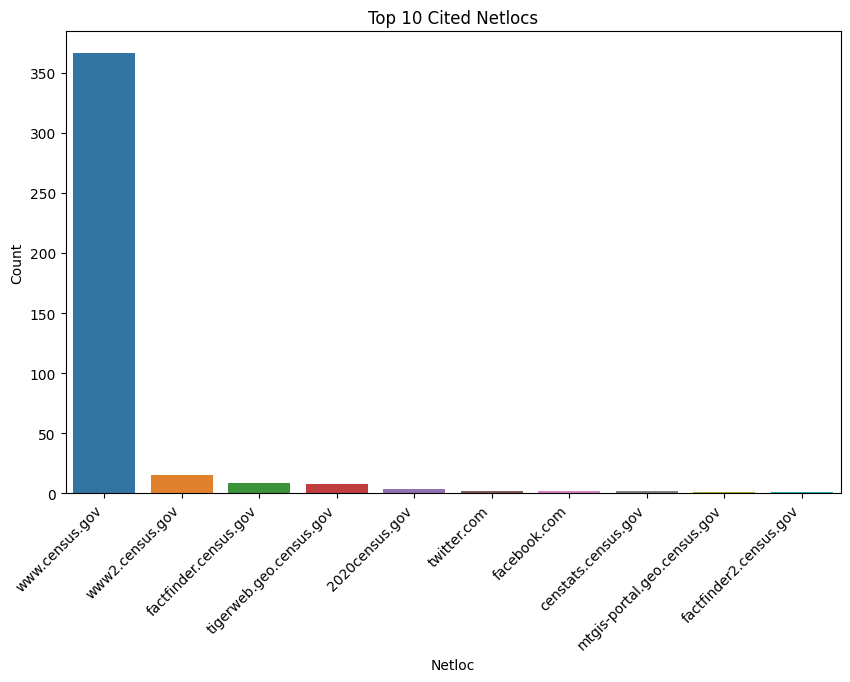

In [243]:
# Plot netloc distribution (top 10)
plt.figure(figsize=(10, 6))
top_netlocs = c_parsed_links['Netloc'].value_counts().nlargest(10)
sns.barplot(x=top_netlocs.index, y=top_netlocs.values)
plt.title('Top 10 Cited Netlocs')
plt.xlabel('Netloc')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [244]:
c_query = c_parsed_links.replace('', pd.NA).dropna(subset=['Query'])
print(c_query)

                                                   URL Scheme  \
5    https://twitter.com/intent/tweet/?text=colonia...  https   
6    https://facebook.com/sharer/sharer.php?u=http:...  https   
8    https://twitter.com/intent/tweet/?text=colonia...  https   
9    https://facebook.com/sharer/sharer.php?u=http:...  https   
26   /customredirect.aspx?url=http%3a%2f%2ffactfind...   <NA>   
28   /customredirect.aspx?url=http%3a%2f%2ffactfind...   <NA>   
34   /customredirect.aspx?url=http%3a%2f%2ffactfind...   <NA>   
35   /rezaee/customredirect.aspx?url=http%3a%2f%2ff...   <NA>   
140  https://www.census.gov/naics/?input=51224&year...  https   
142  https://www.census.gov/naics/?input=45114&year...  https   
147  https://mtgis-portal.geo.census.gov/arcgis/app...  https   
158  http://factfinder.census.gov/servlet/safffacts...   http   
209  http://factfinder.census.gov/servlet/acssafffa...   http   
214  http://factfinder.census.gov/home/saff/main.ht...   http   
247           https://www

Cited Query parameters distribution:
Query_Params
2     12
1      8
3      7
14     1
21     1
Name: count, dtype: int64


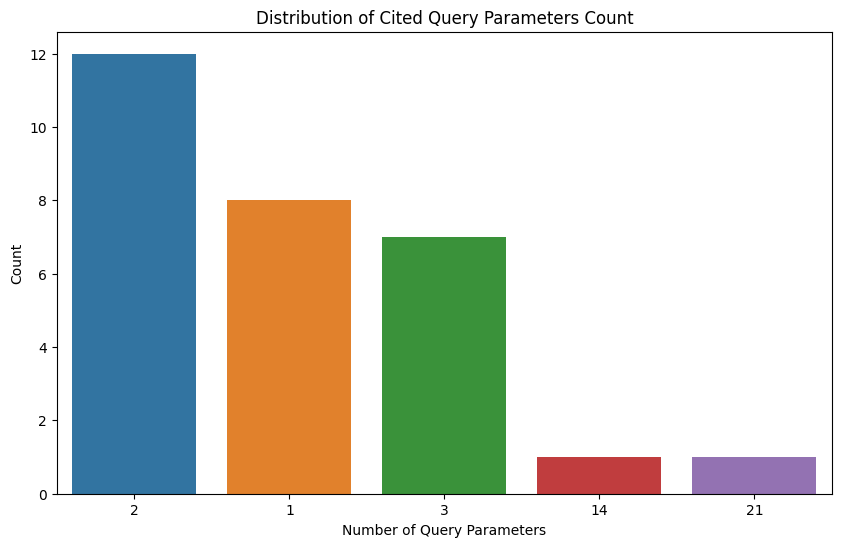

In [245]:
# Extract and count unique query parameters
c_query['Query_Params'] = c_query['Query'].apply(lambda x: len(x.split('&')) if x else 0)
query_params_distribution = c_query['Query_Params'].value_counts()
print("Cited Query parameters distribution:")
print(query_params_distribution)

# Plot query parameters distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=c_query, x='Query_Params', order=c_query['Query_Params'].value_counts().index)
plt.title('Distribution of Cited Query Parameters Count')
plt.xlabel('Number of Query Parameters')
plt.ylabel('Count')
plt.show()

In [246]:
# 1. Identify the most common URL Queries
c_query = c_query['Query']
c_query_counts = Counter(c_query)
c_most_common_query = c_query_counts.most_common(10)

print("\nMost common Cited URL Queries:")
for path, count in c_most_common_query:
    print(f"{path}: {count}")


Most common Cited URL Queries:
text=colonial sense: society-lifestyle: census: governance:%20&url=http://colonialsense.com/society-lifestyle/census/governance.php?cs=12970: 2
u=http://colonialsense.com/society-lifestyle/census/governance.php?cs=12970: 2
searchtype=web&cssp=serp&q=lake%20orion%20village,%20michigan: 2
url=http%3a%2f%2ffactfinder2.census.gov%2fbkmk%2fqs%2f1.0%2fen%2fgeo_search%3a95030&pp=80589: 1
url=http%3a%2f%2ffactfinder2.census.gov%2fbkmk%2fqs%2f1.0%2fen%2fgeo_search%3a95008&pp=42647: 1
url=http%3a%2f%2ffactfinder2.census.gov%2fbkmk%2fqs%2f1.0%2fen%2fgeo_search%3a95628&pp=566920: 1
url=http%3a%2f%2ffactfinder2.census.gov%2fbkmk%2fqs%2f1.0%2fen%2fgeo_search%3a95014&pp=84517: 1
input=51224&year=2022&details=51224: 1
input=45114&year=2017&details=451140: 1
appid=a0013a9dcbb9419e855f563d78e892ef: 1


In [247]:
tables, counts = zip(*c_most_common_query)
# Create a DataFrame from the tables and counts
data = {'Census Table': tables, 'Number of References': counts}
df = pd.DataFrame(data)

# Create an interactive horizontal bar chart
fig = px.bar(df, 
             x='Number of References', 
             y='Census Table', 
             orientation='h',  # Horizontal bars
             title="Top 15 Most Referenced Queries in Cited Instances",
             labels={'Number of References': 'Number of References', 'Census Table': 'Census Table'},
             color='Number of References',  # Color bars based on count
             text='Number of References')  # Show count on hover

# Customize the hover data (you can modify this to include more details)
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Invert the y-axis to show the highest count at the top
fig.update_yaxes(categoryorder='total descending')

# Show the interactive plot
fig.show()